# Linear Algebra 5 - Perceptron Learning Algorithm

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
from sklearn.datasets import make_blobs
# make_blobs does this --> np.random.rand(100,2)

In [18]:
# creating dataset of 2 categories at (2,2) and (8,8) position respectively.
X, Y = make_blobs(centers = [[2,2], [8,8]], random_state = 48)

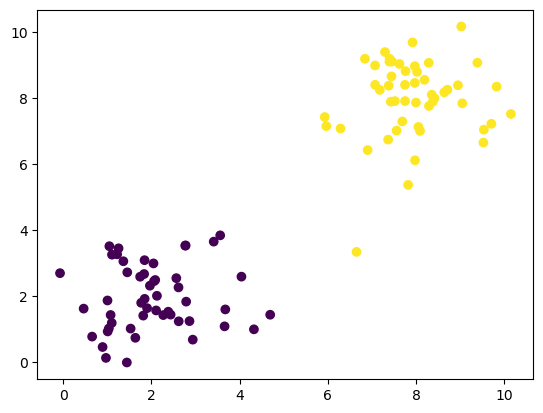

In [20]:
# The color of the points in the plot is determined by the values in the array Y.
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [21]:
X.shape

(100, 2)

In [22]:
Y.shape

(100,)

In [23]:
X[:5]

array([[1.90000578, 1.6416087 ],
       [1.25309101, 3.45353615],
       [3.65790986, 1.09063979],
       [7.56020255, 7.01686082],
       [9.54011221, 7.04522202]])

In [24]:
Y[:5]

array([0, 0, 0, 1, 1])

In [25]:
# changing the negative class to -1
Y[Y == 0] = -1

In [26]:
Y[:5]

array([-1, -1, -1,  1,  1])

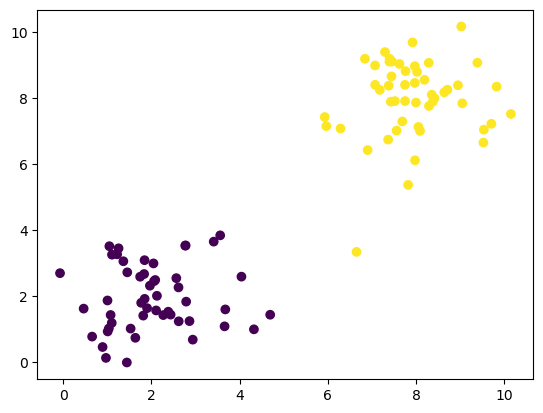

In [28]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [133]:
# This function shows the line on top of scatter plot. 
def show(w, w0, X, Y):
    x1 = np.array([-12, -2, 0, 1, 10])
    x2 = -(w0 + w[0] * x1) / w[1]
    
    plt.plot(x1,x2)
    plt.scatter(X[:, 0], X[:, 1], c = Y)

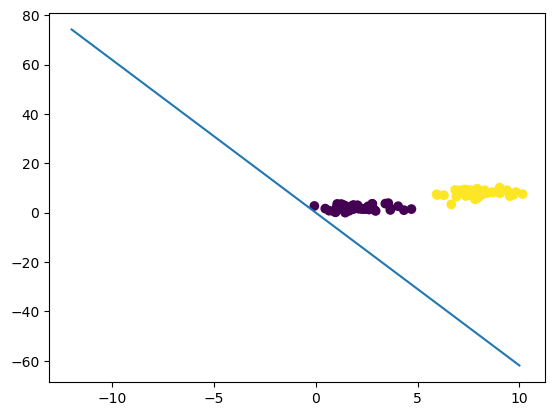

In [162]:
# randomly taken w,w0 (line) and displaying it.

w = np.random.randn(2)  
# generates a 1D NumPy array with two elements, where each element is a random number sampled from a standard normal distribution 
# (with mean 0 and standard deviation 1)

w0 = np.random.random() # returns a random float between 0 (inclusive) and 1 (exclusive)

# plt.annotate("", w, (0,0), arrowprops = {"arrowstyle": "->", "linewidth": 2,"color": "red",})

show(w, w0, X, Y)

In [163]:
Y[:10]

array([-1, -1, -1,  1,  1,  1, -1, -1, -1, -1])

In [296]:
def perceptron(X, Y, w, w0, num_itr = 100):
    # iterate over the number of iters, this is to ensure that we get a best line, 
    # and we try multiple times, until we get the best line. 
    for it in range(num_itr):
        # initialise mis_classification points = 0
        miss_cls = 0
        # iterate over all the points
        for i in range(len(X)):
            # find which side of the hyperplane the point lies. (-1/+1)
            hs = np.sign(np.dot(w, X[i]) + w0)
            # check of the acutal label and predicted label are not equals.
            if hs != Y[i]:
                # then they are misclassified points.
                miss_cls +=1
                
                # In the case use that one point (misclassified point) to update the w and w0.
                w = w+ X[i]*Y[i]
                w0 = w0 + Y[i]
                break # only one misclassfication at a time
        
        # if there are no misclassification then show the line and return w,w0
        if miss_cls==0:
            show(w, w0, X, Y)
            return w, w0
    
    # if all the iterations are over, then show the line and return w,w0
    show(w, w0, X, Y)
    return w, w0

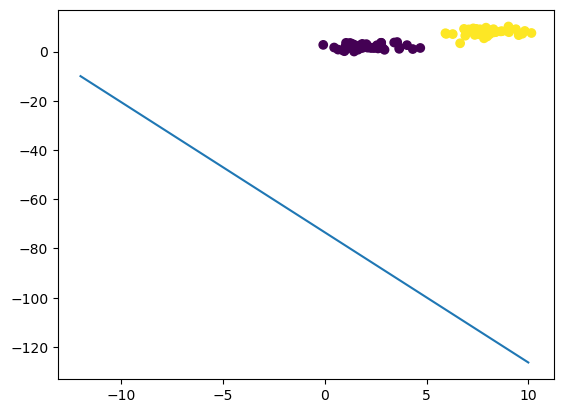

In [355]:
# randomly initialise a line.
w = np.random.randn(2)
w0 = np.random.random()
show(w, w0, X, Y)

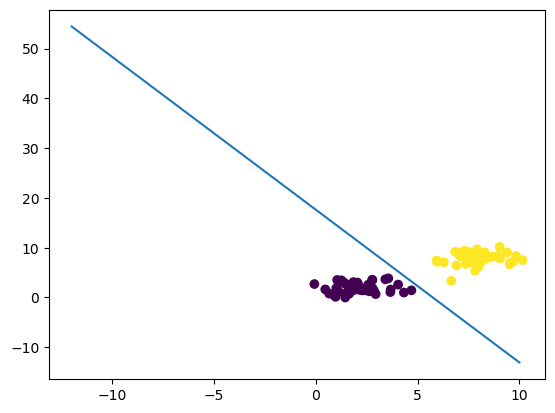

In [361]:
# run this again and again to see how the line is changing in every iteration.
w, w0= perceptron(X, Y, w, w0, num_itr=1)

<strong>If you have any questions, connect with me here:</strong> https://www.linkedin.com/in/khushalkumar/